In [1]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from tools import *
from fit_funcs import *
from entropy import *
import costfun.costfun as cost
import utils.figures as fig_help
from RandomMatrixTheory import goe
import utils.tools as tools

import importlib as imp
def reload_modules():
    imp.reload(cost)
    imp.reload(fig_help)

import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}

%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

linestyle_ls = ['-','--',':', '-.']
linestyle = itertools.cycle(linestyle_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists


config_disorder = 0
scaled_disorder = 1

if config_disorder:
    base_dir = "../results_conf_dis/"
else:
    base_dir = "../results/"

print(base_dir[2:])

/Users/rafal.swietek/Projects/CODES/QHamSolver/QuantumSun/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
/results/


## THERMODYNAMICS

In [2]:

def partition_function(E, beta):
    return np.sum(np.exp(-beta * (E - E[0])))

def mean_energy(E, beta):
    return np.sum(E * np.exp(-beta * (E - E[0]))) / np.sum(np.exp(-beta * (E - E[0])))

def square_energy(E, beta):
    return np.sum(E**2 * np.exp(-beta * (E - E[0]))) / np.sum(np.exp(-beta * (E - E[0])))

def heat_capacity(E, beta):
    return (square_energy(E, beta) - mean_energy(E, beta)**2) * beta**2 / np.log2(E.size)

def thermal_entropy(E, beta):
    return (np.log(partition_function(E, beta)) + (mean_energy(E, beta) - E[0]) * beta) / np.log2(E.size)



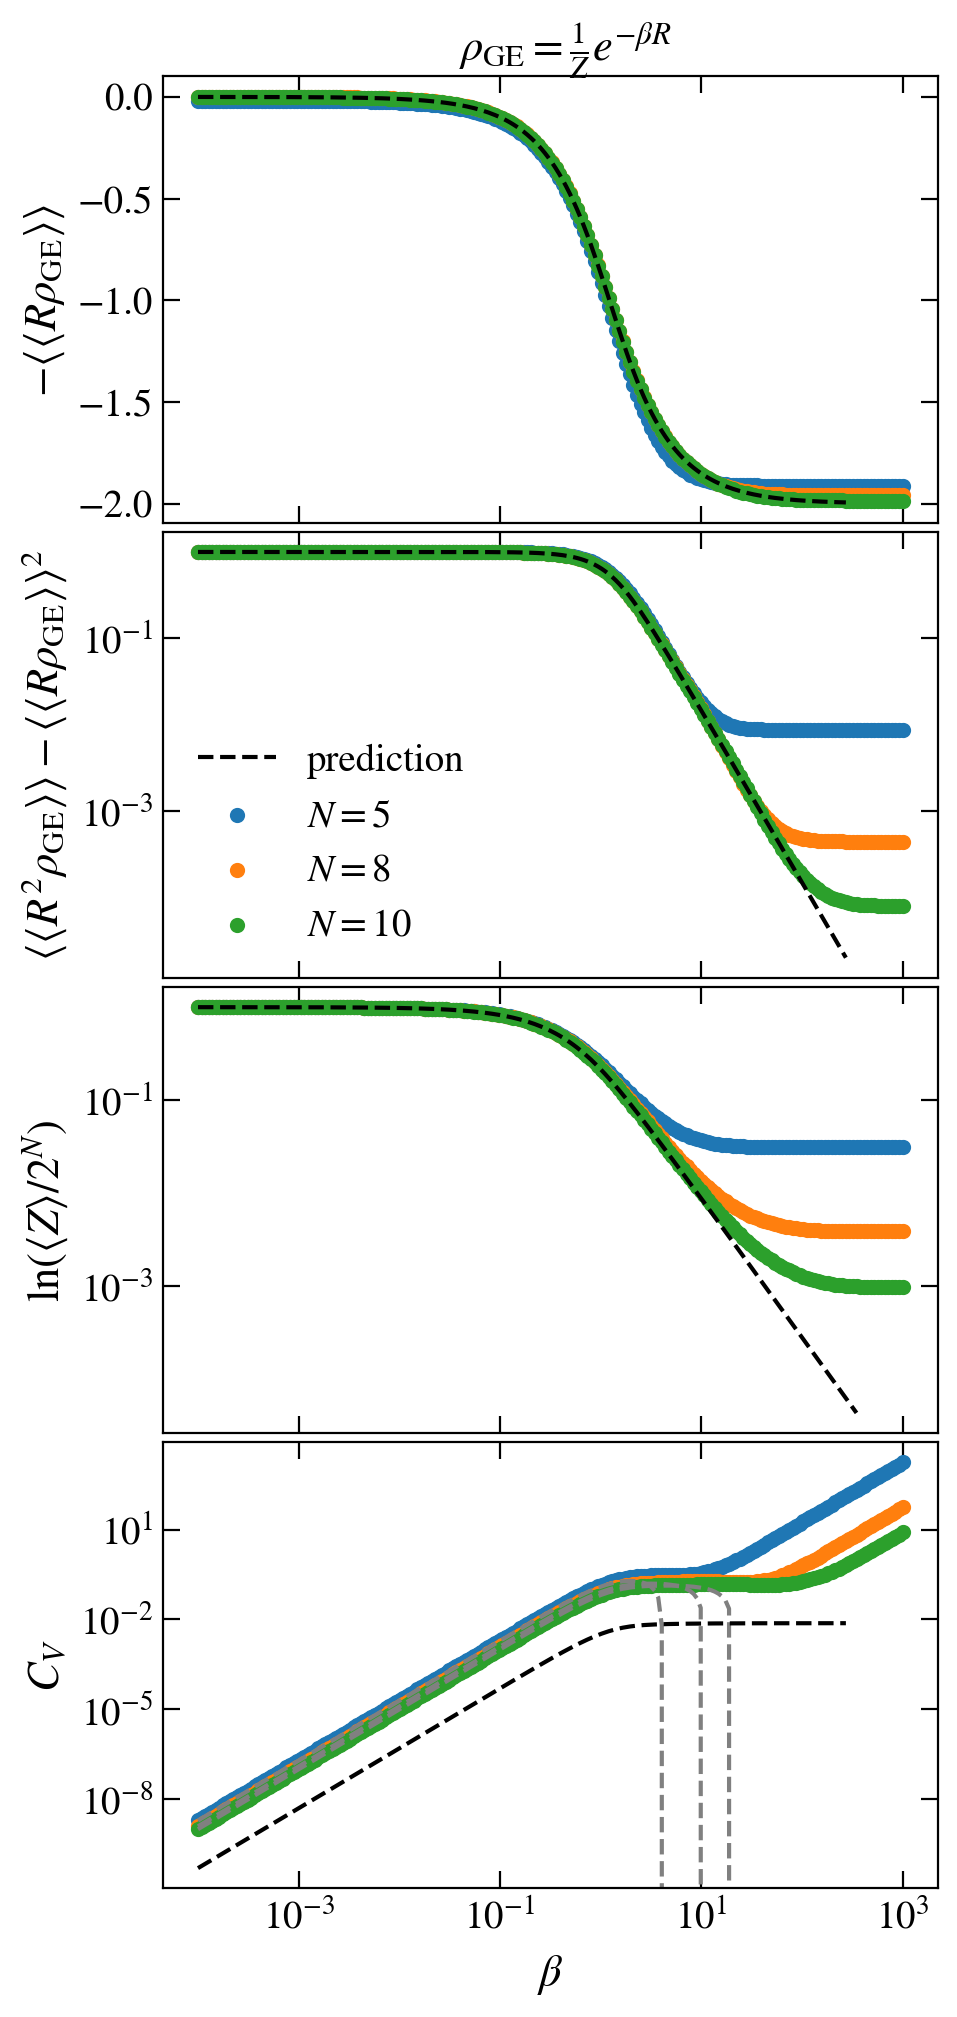

In [29]:
# N = 5
fig, axis = plt.subplots( nrows=4, ncols=1, figsize=(5,12), dpi = 200, sharex=True)

betas = np.logspace(-4, 3, 200)

from scipy.special import iv as BesselI
from scipy.special import modstruve as StruveL

for N in [5, 8, 10]:
    real = 10
    #200 - N**2
    Z = np.zeros((betas.size))
    E_av = np.zeros((betas.size))
    E2_av = np.zeros((betas.size))
    Cv = np.zeros((betas.size))
    for _ in range(real):
        E = goe.eigs(N)
        Z += np.array([partition_function(E, beta) for beta in betas]) / real
        E_av_tmp = np.array([mean_energy(E, beta) for beta in betas])
        E_av2_tmp = np.array([square_energy(E, beta) for beta in betas])

        Cv += (E_av2_tmp - E_av_tmp**2) * betas**2 / np.log2(E.size) / real
        E_av += (E_av_tmp / real)
        E2_av += E_av2_tmp / real
        # axis.plot(betas, np.abs(np.array([square_energy(E, beta) for beta in betas]) - prediction(betas, N)), label=r"$D=%d$"%E.size)
    axis[0].scatter(betas, E_av, label=r"$N=%d$"%N, s=20)
    axis[1].scatter(betas, E2_av-E_av**2, label=r"$N=%d$"%N, s=20)
    # print(Z)
    axis[2].scatter(betas, (Z / 2**N), label=r"$N=%d$"%N, s=20)
    axis[3].scatter(betas, (E2_av-E_av**2) * betas**2 / np.log2(E.size), label=r"$N=%d$"%N, s=20)
    
    # axis[2].plot(betas, np.log(goe.partition_function(np.sqrt(2**(N) /(2**N + 1)) * betas, N) / 2**N), color='gray', ls='--')
    axis[3].plot(betas, (goe.heat_capacity(np.sqrt(2**(N) /(2**N + 1)) * betas, N)), color='gray', ls='--')

N=200
axis[0].plot(betas, goe.energy_mean(np.sqrt(2**(N) /(2**N + 1)) * betas, N), color='black', ls='--')
axis[1].plot(betas, (goe.energy_variance(np.sqrt(2**(N) /(2**N + 1)) * betas, N) - goe.energy_mean(np.sqrt(2**(N) /(2**N + 1)) * betas, N)**2), color='black', ls='--')

axis[2].plot(betas, np.exp(-2*betas) * (goe.partition_function(np.sqrt(2**(N) / (2**N + 1)) * betas, N)), color='black', ls='--')
axis[3].plot(betas, (goe.heat_capacity(np.sqrt(2**(N) /(2**N + 1)) * betas, N)), color='black', ls='--')

axis[1].plot(np.nan, np.nan, color='black', ls='--', label='prediction')

#fig_help.set_plot_elements(axis, ylabel=r"$|\langle R^2\rho_{GE}\rangle-Y_N(\beta)|$", xlabel=r"$\beta$", font_size=14, set_legend=True, xscale='log', yscale='log')
axis[0].set_title(r"$\quad\rho_{\rm GE}=\frac{1}{Z}e^{-\beta R}$", fontsize=16)
fig_help.set_plot_elements(axis[0], ylabel=r"$-\langle\langle R\rho_{\rm GE}\rangle\rangle$", xlabel=r"", font_size=14, set_legend=False, xscale='log', yscale='linear')
fig_help.set_plot_elements(axis[1], ylabel=r"$\langle\langle R^2\rho_{\rm GE}\rangle\rangle-\langle\langle R\rho_{\rm GE}\rangle\rangle^2$", xlabel=r"", font_size=14, set_legend=True, xscale='log', yscale='log')
fig_help.set_plot_elements(axis[2], ylabel=r"$\ln(\langle Z\rangle/2^N)$", xlabel=r"$\beta$", font_size=14, set_legend=False, xscale='log', yscale='log')
fig_help.set_plot_elements(axis[3], ylabel=r"$C_V$", xlabel=r"$\beta$", font_size=14, set_legend=False, xscale='log', yscale='log')

fig.subplots_adjust(wspace = 0.02, hspace=0.02)

## QUANTUM MOON

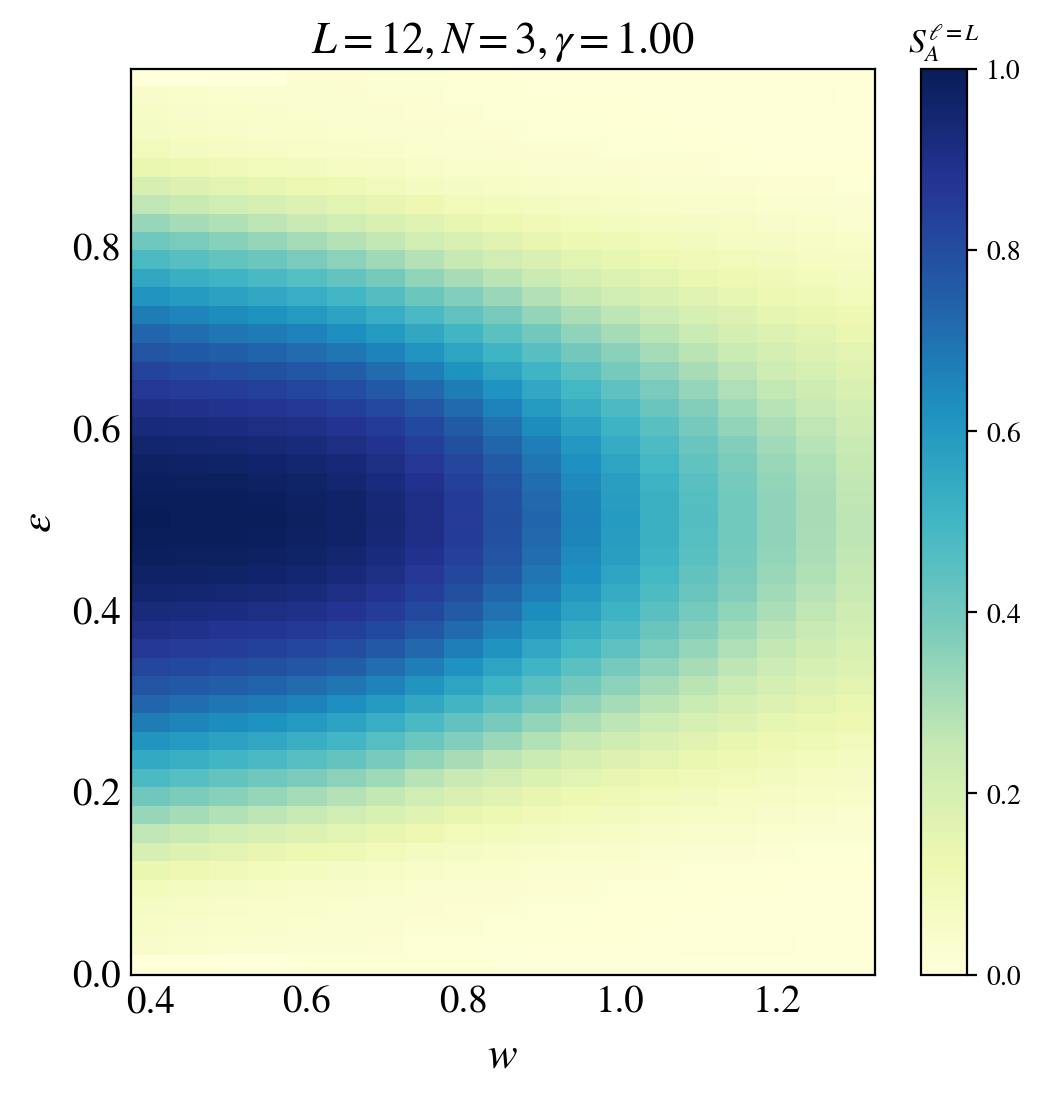

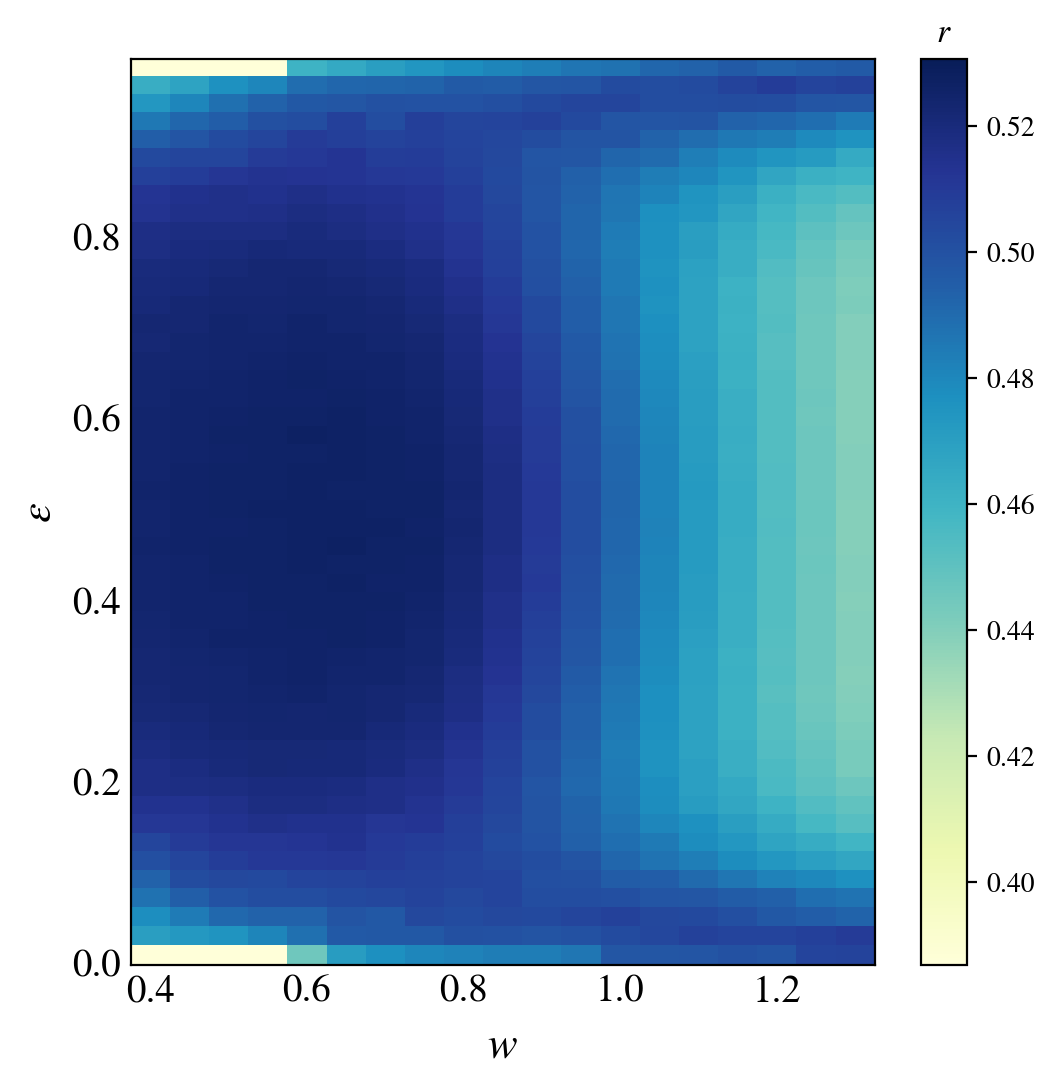

In [4]:

markers = itertools.cycle(markers_ls)


L_total=15

fig1, axis1 = plt.subplots( nrows=1, ncols=1, figsize=(6,6), dpi = 200)
fig2, axis2 = plt.subplots( nrows=1, ncols=1, figsize=(6,6), dpi = 200)
axis = [axis1, axis2]

J=1.0
alfa=1.0
h=0.0
w=2.0
zeta=0.0
N=3
gamma=1.0
ini_ave=0
L = L_total - N

w_vals = np.linspace(0.4, 1.3, 19)
    
sub_sizes = np.arange(0, L_total+1)

density = np.zeros((sub_sizes.size, w_vals.size))

def frac(dim):
    return 500

ell = L_total-1

energy_density = None
entropy_density = []
gap_ratio_density = []
for ii, w in enumerate(w_vals):
    name = base_dir + 'Entropy/Eigenstate/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', scaled_disorder=scaled_disorder)
    if exists(name):
        with h5py.File(name, "r") as file:
            energy_density = np.array(file.get('energy density'))
            S_dens = np.array(file.get('entropy density'))[ell]
            gap_ratio = np.array(file.get('gap ratio density'))
            
            entropy_density.append(S_dens / page(1, L_total - 1))  
            gap_ratio_density.append(gap_ratio)  
    else:
        print(name)

energy_density = np.array(energy_density)
entropy_density = np.array(entropy_density)

disorder = np.array([w_vals for _ in entropy_density[0]])

#white = plt.get_cmap('seismic', 100)(0.5*np.ones(1))
upper = plt.get_cmap('YlGnBu', 100)(np.linspace(0.0, 1.0, 100))
colors = np.vstack((upper))  

mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

X, Y = np.meshgrid(w_vals, energy_density)

p = axis1.pcolormesh(X, Y, np.transpose(entropy_density), shading='nearest', cmap=mymap, vmin=0, vmax=1)
fig_help.set_plot_elements(axis1, ylabel=r"$\epsilon$", xlabel=r"$w$", font_size=14, set_legend=False)
axis1.set_title(r"$L=%d, N=%d, \gamma=%.2f$"%(L,N, gamma), fontsize=16)
clb = fig1.colorbar(p)
clb.ax.set_title(r"$S^{\ell=L}_A$")

p = axis2.pcolormesh(X, Y, np.transpose(gap_ratio_density), shading='nearest', cmap=mymap, vmin=0.3869, vmax=0.5307)
fig_help.set_plot_elements(axis2, ylabel=r"$\epsilon$", xlabel=r"$w$", font_size=14, set_legend=False)
clb2 = fig2.colorbar(p)
clb2.ax.set_title(r"$r$")

# axis.xaxis.set_minor_locator(plt.NullLocator())
# axis.yaxis.set_minor_locator(plt.NullLocator())

#legend = axis.legend(frameon=1, fontsize=14, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(0.0,1.0), facecolor="gray")
plt.show()

## QUANTUM SUN

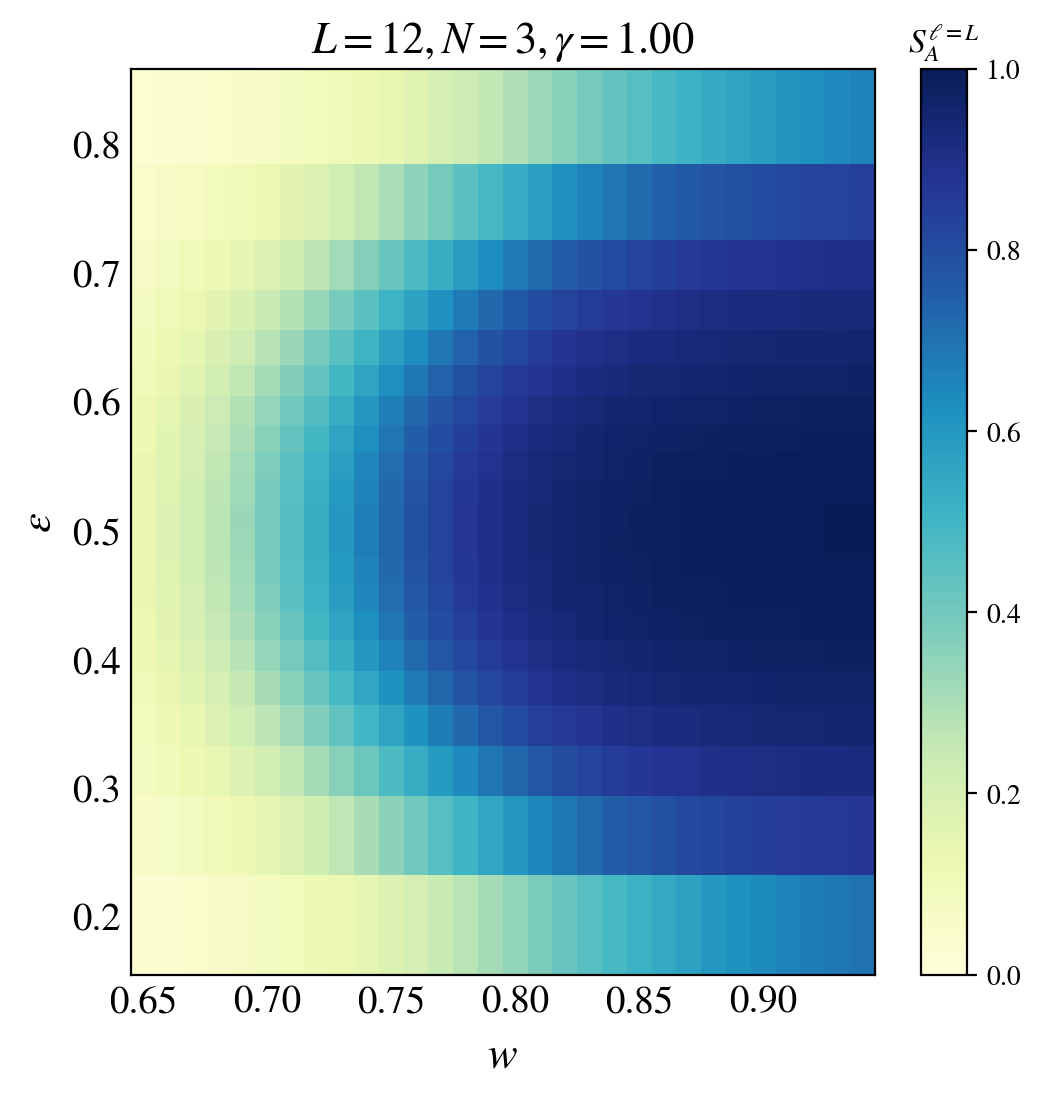

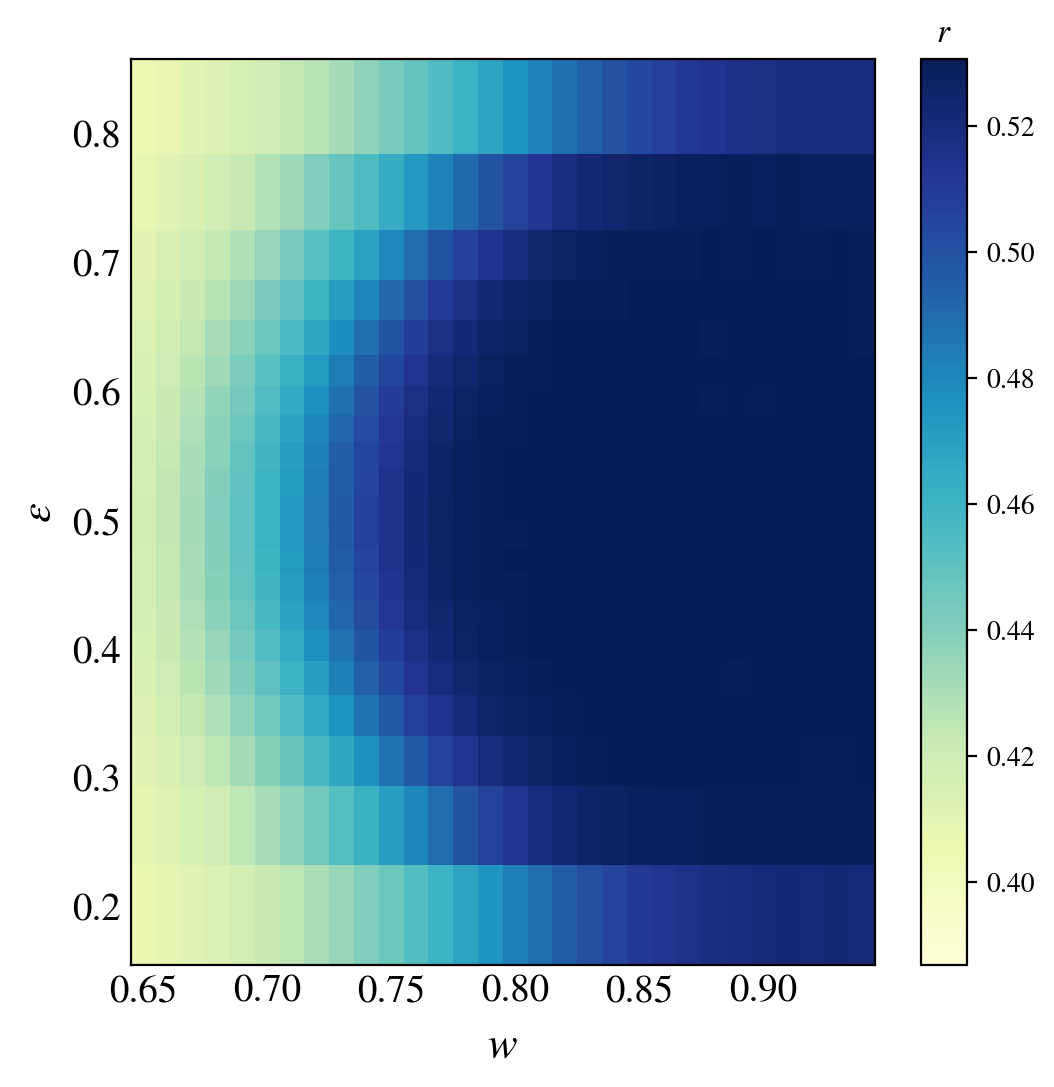

In [23]:

markers = itertools.cycle(markers_ls)


L_total=15

fig1, axis1 = plt.subplots( nrows=1, ncols=1, figsize=(6,6), dpi = 200)
fig2, axis2 = plt.subplots( nrows=1, ncols=1, figsize=(6,6), dpi = 200)
axis = [axis1, axis2]

J=1.0
alfa=1.0
h=1
w=0.5
zeta=0.2
N=3
gamma=1.0
ini_ave=0
L = L_total - N
scaled_disorder=0

alfa_vals = np.linspace(0.65, 0.94, 30)
    
sub_sizes = np.arange(0, L_total+1)

density = np.zeros((sub_sizes.size, alfa_vals.size))

ell = L_total-1

energy_density = None
entropy_density = []
gap_ratio_density = []
for ii, alfa in enumerate(alfa_vals):
    name = base_dir + 'Entropy/Eigenstate/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', scaled_disorder=scaled_disorder)
    if exists(name):
        with h5py.File(name, "r") as file:
            energy_density = np.array(file.get('energy density'))
            S_dens = np.array(file.get('entropy density'))[ell]
            gap_ratio = np.array(file.get('gap ratio density'))
            
            entropy_density.append(S_dens / page(1, L_total - 1))  
            gap_ratio_density.append(gap_ratio)  
    else:
        print(name)

energy_density = np.array(energy_density)
entropy_density = np.array(entropy_density)

interaction = np.array([alfa_vals for _ in entropy_density[0]])

#white = plt.get_cmap('seismic', 100)(0.5*np.ones(1))
upper = plt.get_cmap('YlGnBu', 100)(np.linspace(0.0, 1.0, 100))
colors = np.vstack((upper))  

mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

X, Y = np.meshgrid(alfa_vals, energy_density)

p = axis1.pcolormesh(X, Y, np.transpose(entropy_density), shading='nearest', cmap=mymap, vmin=0, vmax=1)
fig_help.set_plot_elements(axis1, ylabel=r"$\epsilon$", xlabel=r"$w$", font_size=14, set_legend=False)
axis1.set_title(r"$L=%d, N=%d, \gamma=%.2f$"%(L,N, gamma), fontsize=16)
clb = fig1.colorbar(p)
clb.ax.set_title(r"$S^{\ell=L}_A$")

p = axis2.pcolormesh(X, Y, np.transpose(gap_ratio_density), shading='nearest', cmap=mymap, vmin=0.3869, vmax=0.5307)
fig_help.set_plot_elements(axis2, ylabel=r"$\epsilon$", xlabel=r"$w$", font_size=14, set_legend=False)
clb2 = fig2.colorbar(p)
clb2.ax.set_title(r"$r$")

# axis.xaxis.set_minor_locator(plt.NullLocator())
# axis.yaxis.set_minor_locator(plt.NullLocator())

#legend = axis.legend(frameon=1, fontsize=14, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(0.0,1.0), facecolor="gray")
plt.show()

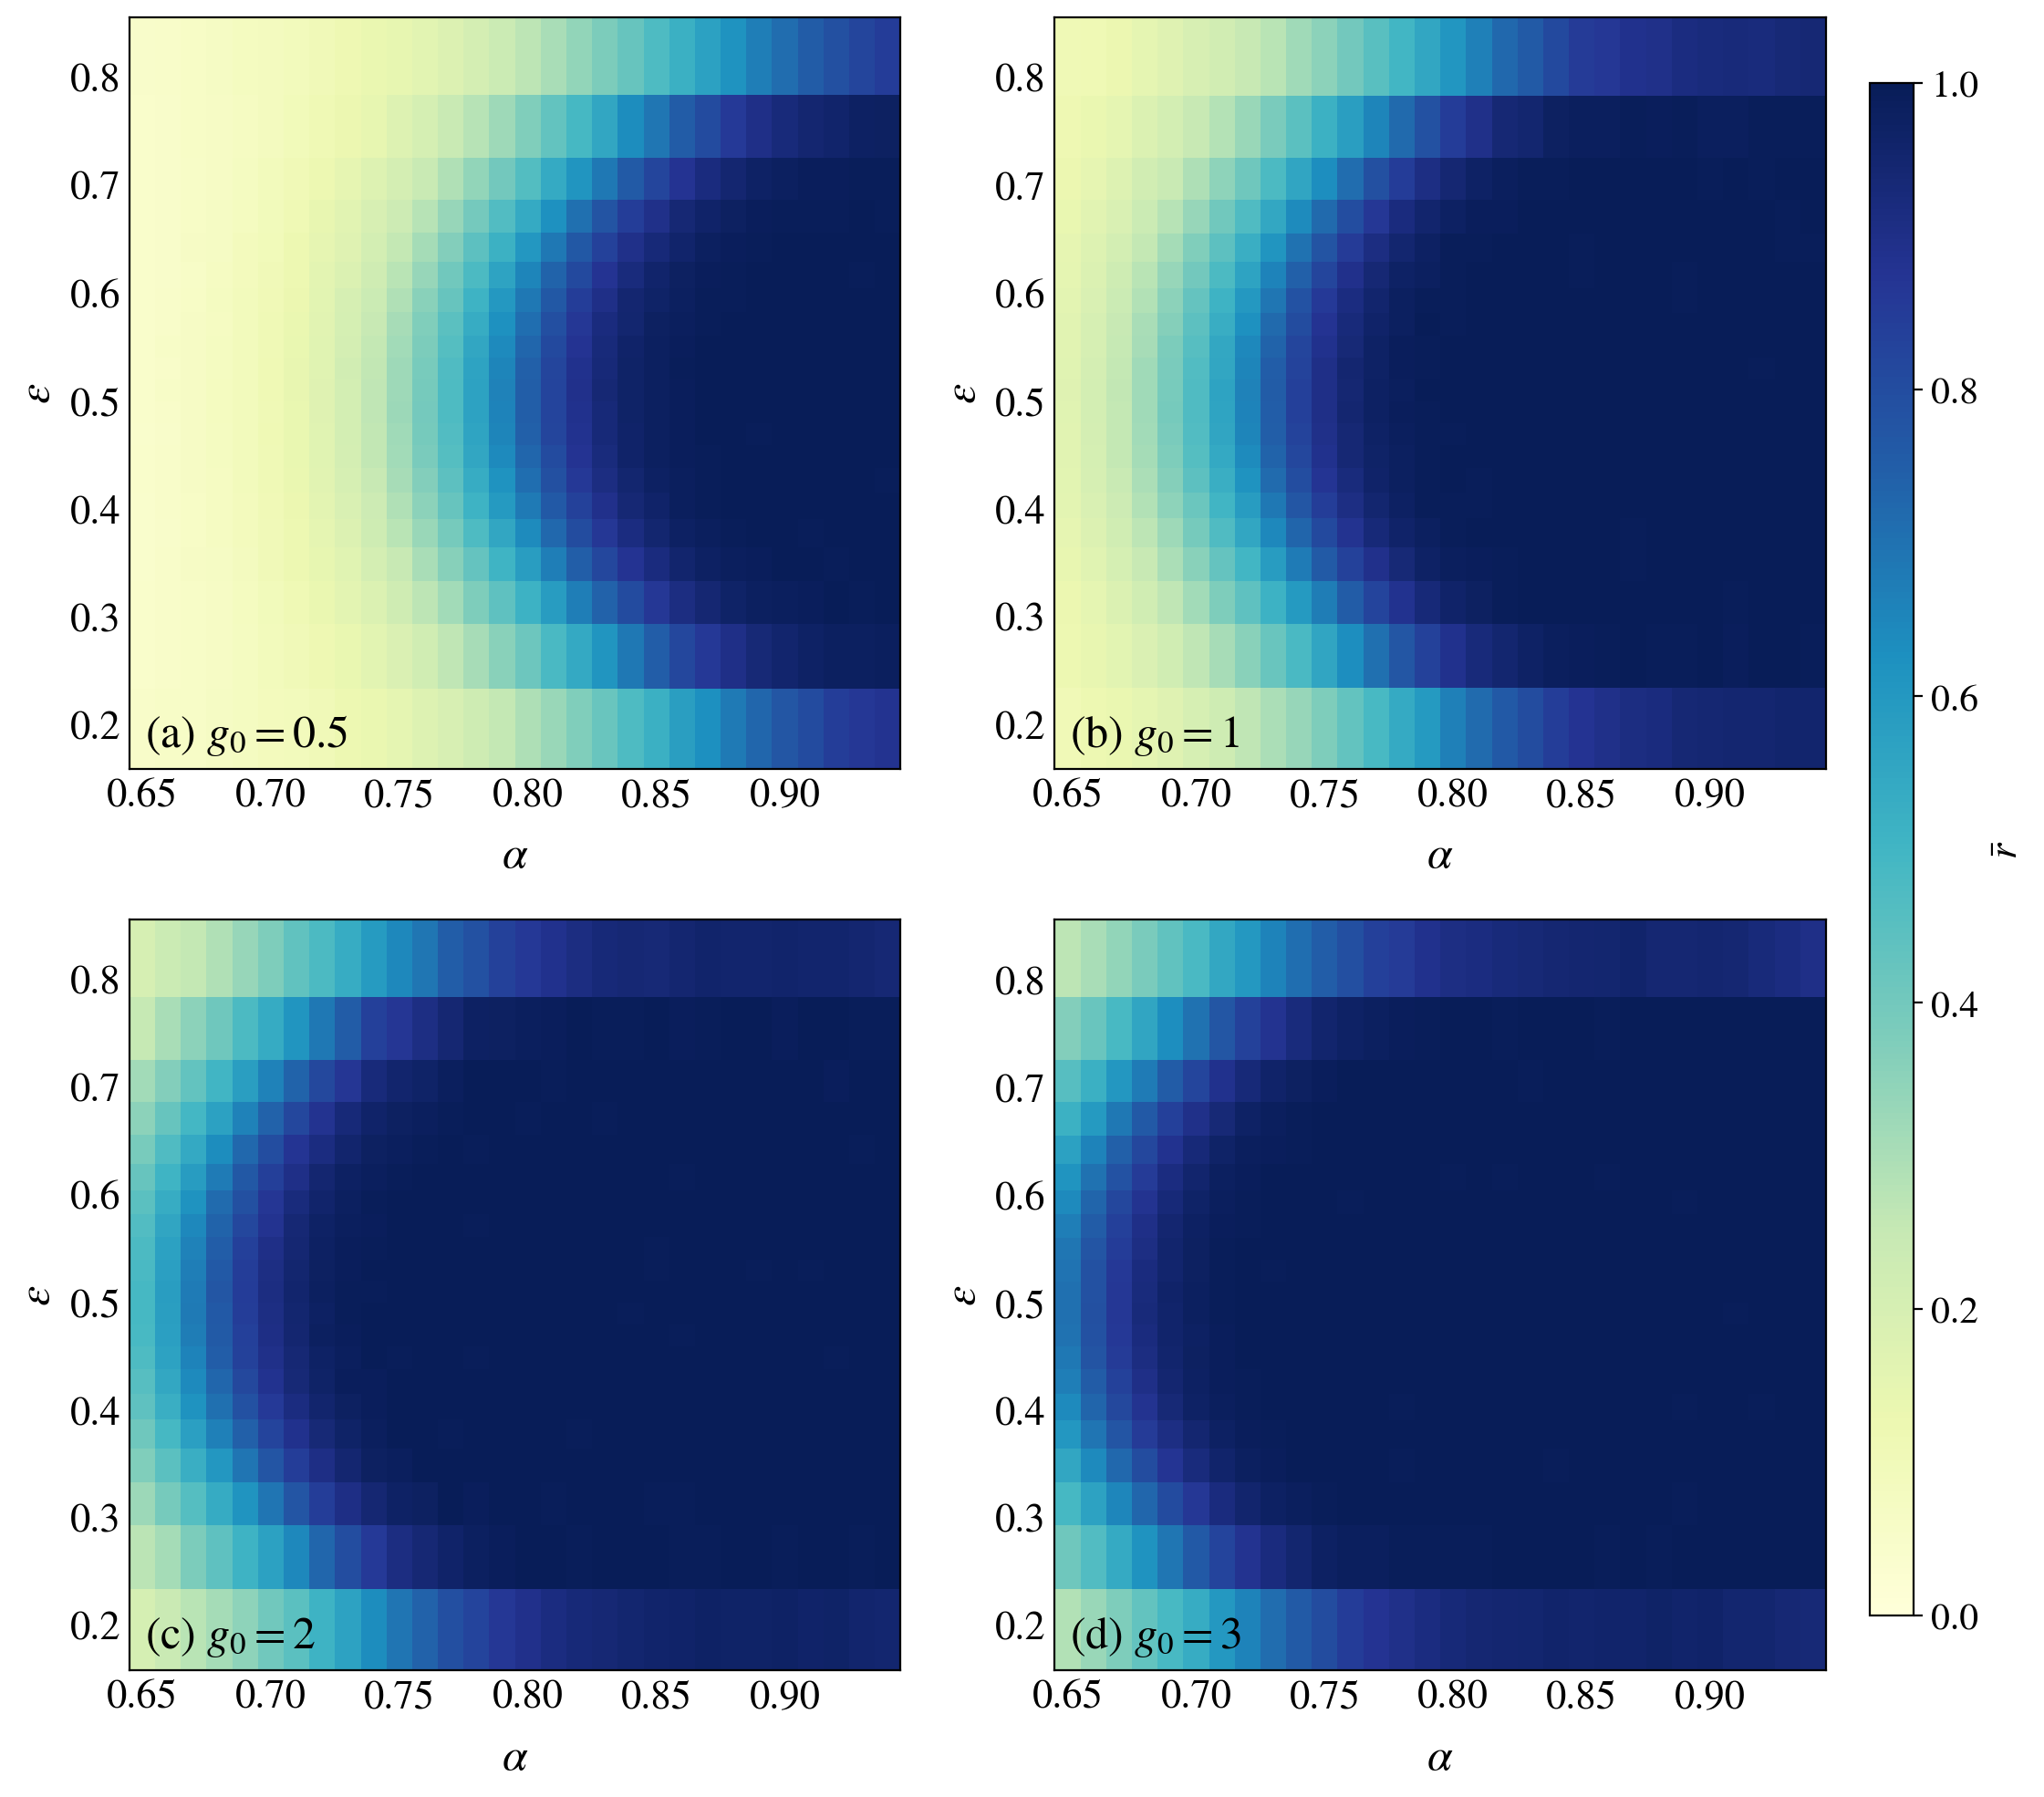

In [22]:

markers = itertools.cycle(markers_ls)


L_total=16

fig, axis = plt.subplots( nrows=2, ncols=2, figsize=(12,12), dpi = 200)
axis = axis.flatten()

J=1.0
alfa=1.0
h=1
w=0.5
zeta=0.2
N=3
gamma=1.0
ini_ave=0
L = L_total - N
scaled_disorder=0

plot_gaps = 1
p = 1


    
sub_sizes = np.arange(0, L_total+1)

for ii, J in enumerate([0.5, 1, 2, 3]):
    alfa_vals = np.linspace(0.65, 0.94, 30)# if J == 1 or J == 3 else np.array( [*np.linspace(0.2, 0.6, 9), *np.linspace(0.65, 0.94, 30)] )
    ax = axis[ii]
    density = np.zeros((sub_sizes.size, alfa_vals.size))

    LA = L_total - p

    energy_density = None
    entropy_density = []
    gap_ratio_density = []
    for ii, alfa in enumerate(alfa_vals):
        name = base_dir + 'Entropy/Eigenstate/' + info(L=L, N=N, J=J, gamma=gamma, zeta=zeta, alfa=alfa, h=h, w=w, ext='.hdf5', scaled_disorder=scaled_disorder)
        if exists(name):
            with h5py.File(name, "r") as file:
                energy_density = np.array(file.get('energy density'))
                S_dens = np.array(file.get('entropy density'))[LA]
                gap_ratio = np.array(file.get('gap ratio density'))
                
                entropy_density.append(S_dens / page(1, L_total - 1))  
                gap_ratio_density.append((gap_ratio - 0.3867) / (0.5307 - 0.3867))  
        else:
            print(name)

    energy_density = np.array(energy_density)
    entropy_density = np.array(entropy_density)

    interaction = np.array([alfa_vals for _ in entropy_density[0]])

    #white = plt.get_cmap('seismic', 100)(0.5*np.ones(1))
    upper = plt.get_cmap('YlGnBu', 100)(np.linspace(0.0, 1.0, 100))
    colors = np.vstack((upper))  

    mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

    X, Y = np.meshgrid(alfa_vals, energy_density)

    ydata = gap_ratio_density if plot_gaps else entropy_density
    heatmap = ax.pcolormesh(X, Y, np.transpose(ydata), shading='nearest', cmap=mymap, vmin=0, vmax=1)
    fig_help.set_plot_elements(ax, ylabel=r"$\epsilon$", xlabel=r"$\alpha$", font_size=16, set_legend=False)
    # ax.set_title(r"$L=%d, g_0=%.2f$"%(L,J), fontsize=16)

    # p = axis2.pcolormesh(X, Y, np.transpose(gap_ratio_density), shading='nearest', cmap=mymap, vmin=0.3869, vmax=0.5307)
    # fig_help.set_plot_elements(axis2, ylabel=r"$\epsilon$", xlabel=r"$w$", font_size=14, set_legend=False)
    # clb2 = fig2.colorbar(p)
    # clb2.ax.set_title(r"$r$")

    # axis.xaxis.set_minor_locator(plt.NullLocator())
    # axis.yaxis.set_minor_locator(plt.NullLocator())

    #legend = axis.legend(frameon=1, fontsize=14, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(0.0,1.0), facecolor="gray")

axis[0].annotate(r"(a) $g_0=0.5$", fontsize=18, xy=(0.02, 0.03), xycoords='axes fraction')
axis[1].annotate(r"(b) $g_0=1$", fontsize=18, xy=(0.02, 0.03), xycoords='axes fraction')
axis[2].annotate(r"(c) $g_0=2$", fontsize=18, xy=(0.02, 0.03), xycoords='axes fraction')
axis[3].annotate(r"(d) $g_0=3$", fontsize=18, xy=(0.02, 0.03), xycoords='axes fraction')
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
# fig.colorbar(im, cax=cbar_ax)
cbar = fig.colorbar(heatmap, cax=cbar_ax, aspect=1)
cbar.set_label(r"$\bar{r}$" if plot_gaps else r"$\bar{s}_{%d}$"%p, fontsize=16)
cbar.ax.tick_params(labelsize=15)

plt.show()